# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [4]:
df.shape

(357727, 19)

### List the columns and their data types

In [5]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

In [6]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [ ]:
CPSC Case #      int64   # Number of case 
trmt_date       object   Treatment Date
psu              int64
weight         float64   Weight of patient in floating number
stratum         object
age              int64   Integer referring to age of patient
sex              int64   Integer referring to sex of patient
race             int64   Integer referring to race of patient
race_other      object
diag             int64   Code referring to diagnosis
diag_other      object
body_part        int64   Integer referring to bodypart affected
disposition      int64
location         int64
fmv              int64
prod1            int64   Specific product code
prod2          float64   Specific product code that has a floating number 
narr1           object   Description of injury 
narr2 

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [7]:
df.sex.shape

(357727,)

In [8]:
df.sex.value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [9]:
df.sex = df.sex.replace(1, "Male")
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


In [10]:
df.sex.replace(2, "Female", inplace=True)
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


In [11]:
df.sex = df.sex.replace(0, "Not recorded")
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [12]:
df.sex.value_counts()

Male            195071
Female          162654
Not recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

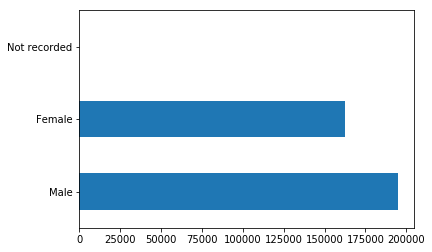

In [13]:
%matplotlib inline
df.sex.value_counts().plot(kind='barh')

In [ ]:
# df[df.sex != "Not recorded"].sex.value_counts().plot()

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [14]:
import numpy as np
np.nan

nan

In [15]:
df.sex.replace("Not recorded", np.nan, inplace=True)

In [16]:
df.sex.value_counts()

Male      195071
Female    162654
Name: sex, dtype: int64

In [17]:
# If we still want to see the nans
df.sex.value_counts(dropna=False)

Male      195071
Female    162654
NaN            2
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

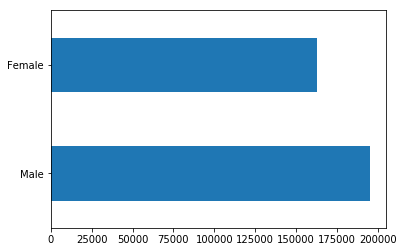

In [18]:
df.sex.value_counts().plot(kind='barh')

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [19]:
# df[df.narr1.str.contains("PUNCH")] & df.narr1.str.contains("WALL")
# BUT WE SHOULD USE REGEX 
# df[df.narr1.str.contains("F[AE]LL.*BI[CK]")]
wall_punch = df[df.narr1.str.contains("PUNCH.*WALL")]
wall_punch

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."
782,150805902,07/22/2015,3,74.8813,L,28,Male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN
1098,150455805,03/27/2015,93,15.0591,V,25,Female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.
1571,150519707,04/21/2015,77,15.0591,V,14,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN
1616,151112964,09/21/2015,26,15.7762,V,16,Male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN
1660,150446653,04/14/2015,33,15.0591,V,52,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN


## Graph the gender distribution of wall-punching.

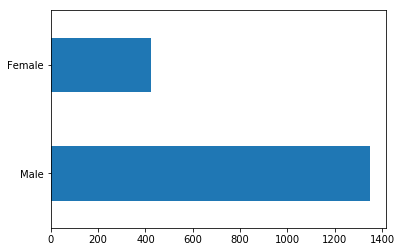

In [20]:
wall_punch.sex.value_counts().plot(kind='barh')

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

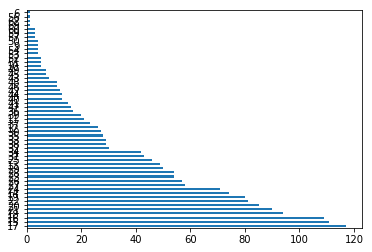

In [21]:
wall_punch.age.value_counts().plot(kind='barh')

In [22]:
wall_punch.age.value_counts().mean()

33.433962264150942

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [23]:
df.trmt_date

0         07/11/2015
1         07/06/2015
2         08/02/2015
3         06/26/2015
4         07/04/2015
5         07/02/2015
6         06/08/2015
7         06/14/2015
8         07/16/2015
9         07/13/2015
10        07/04/2015
11        07/20/2015
12        07/04/2015
13        06/27/2015
14        07/16/2015
15        06/06/2015
16        08/27/2015
17        07/26/2015
18        09/19/2015
19        09/26/2015
20        09/09/2015
21        09/07/2015
22        09/14/2015
23        09/05/2015
24        09/05/2015
25        09/28/2015
26        09/29/2015
27        09/04/2015
28        09/19/2015
29        09/22/2015
             ...    
357697    05/19/2015
357698    07/08/2015
357699    06/27/2015
357700    11/01/2015
357701    11/02/2015
357702    11/04/2015
357703    10/28/2015
357704    06/08/2015
357705    06/08/2015
357706    05/20/2015
357707    01/13/2015
357708    05/12/2015
357709    05/13/2015
357710    05/15/2015
357711    05/31/2015
357712    05/27/2015
357713    05/

In [24]:
# treat as a string
# str.extract - put parentheses around what you want to keep 
months = df.trmt_date.str.extract("(\d\d)")
months.value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


05    34066
08    32917
09    32473
07    32184
06    31315
10    30587
04    30154
03    29220
11    27154
01    27109
12    26845
02    23703
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

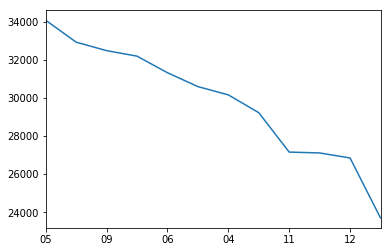

In [25]:
months.value_counts().plot()

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

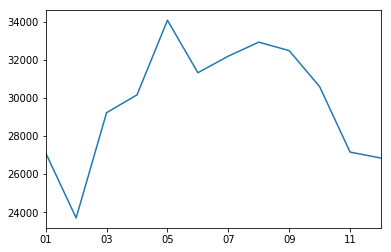

In [26]:
months.value_counts().sort_index().plot()

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [27]:
air_condition = df[df.narr1.str.contains(" AIR .*COND")]
air_condition

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
1917,150902259,08/30/2015,58,15.7762,V,9,Male,0,NaN,59,NaN,35,1,1,0,381,NaN,9 YOM HIT KNEE ON AIR CONDITIONER,DX LACERATION
1940,150446654,04/22/2015,33,15.0591,V,41,Male,1,NaN,54,NaN,83,1,1,0,381,NaN,41 YOM DROPPED AIR CONDITIONER ON L FOOT AT HO...,NaN
3464,150451830,04/19/2015,53,15.0591,V,33,Female,1,NaN,71,SHOULDER PAIN,30,1,1,0,381,NaN,33YOF-SHOULDER & ANKLE PAIN-FELL WHILE CARRYIN...,ME
3795,150717896,07/05/2015,7,83.2157,S,49,Female,0,NaN,59,NaN,88,1,1,0,381,NaN,49 Y O F LIP LACERATION SHE TRIPPED AND STRUCK...,PLAYING WITH HER DOG
6958,151143964,11/13/2015,51,74.8813,L,18,Female,2,NaN,71,HEADACHE,75,1,0,0,381,NaN,18 YO F C/O FRONTAL HEADACHE S/P HITTING HEAD ...,DAY DX HEADACHE
8569,151059865,10/21/2015,95,16.5650,V,53,Male,1,NaN,64,NaN,79,1,0,0,381,NaN,LUMBAR STR. 53YOM STRAINED LOWER BACK MOVING ...,NaN
11746,150703973,06/22/2015,68,97.9239,M,61,Male,1,NaN,67,NaN,85,1,1,0,381,NaN,61 YOM TRIED TAKING OFF THE COVER OF AIR CONDI...,"ENT THROUGH BODY. DX MILD RHABDOMYOLYSIS, ELEC..."
11867,151115868,10/14/2015,54,49.2646,M,20,Female,1,NaN,53,NaN,83,1,1,0,381,NaN,20YOF DROPPED AIR CONDITIONER ON RT FOOT. PAIN...,TOE DX: FOOT CONTUSION
12845,150726308,07/05/2015,89,74.8813,L,28,Male,1,NaN,57,NaN,31,1,1,0,381,NaN,28 YO M PT WAS WORKING ON HIS AIR CONDITIONER ...,"T LANDING ON THE GROUND,HURTING UPPER BACK,.DX..."
14597,150852426,08/18/2015,31,5.6748,C,11,Male,2,NaN,59,NaN,75,1,0,0,381,NaN,11 YO MALE RUNNING AND HIT HEAD ON AN AIR COND...,TION


In [28]:
air_condition['trmt_date']
#months = df.trmt_date.str.extract("(\d\d)")
#months.value_counts()
air_months = air_condition.trmt_date.str.extract("(\d\d)")
air_months.value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


07    32
10    31
06    29
09    29
05    28
08    26
04    18
11    13
12    13
03    12
01     7
02     4
Name: trmt_date, dtype: int64

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [29]:
#if you set the dtype you can do this without astype(str)
# df.prod1.str.pad(4, fillchar='0')
# If prod1 was not a string column yet
# you didnt do dtype={'prod1': 'str'}
df.prod1.astype(str).str.pad(4, fillchar='0')

0         1267
1         1439
2         3274
3         0611
4         1893
5         1715
6         1138
7         5040
8         1807
9         4057
10        1894
11        1267
12        3274
13        1807
14        4057
15        0894
16        1817
17        0380
18        4014
19        0474
20        0676
21        5036
22        1239
23        1329
24        0611
25        0679
26        1884
27        3274
28        4076
29        1211
          ... 
357697    5017
357698    1616
357699    1426
357700    4076
357701    4014
357702    1233
357703    1807
357704    3262
357705    3286
357706    1871
357707    0676
357708    0464
357709    0836
357710    1205
357711    4076
357712    1807
357713    1936
357714    1842
357715    3216
357716    1913
357717    1616
357718    1522
357719    1616
357720    1807
357721    1301
357722    1864
357723    1931
357724    3250
357725    0464
357726    3273
Name: prod1, Length: 357727, dtype: object

In [30]:
# df.race_other.value_counts()
# df.race_other.replace("UNKN", )
# df[df.race_other.str.contains("UN.*N", na=False)]['race_other'].value_counts()
df.race_other = df.race_other.str.replace("UN.*N", "UNKNOWN")
df.race_other.value_counts()
# df.race_other.str.lower().str.contains("hisp")

HISPANIC           14389
MULTI-RACIAL        1727
UNKNOWN             1664
HISP                1334
NS                   495
SOMALI               318
MULTIRACIAL          146
BIRACIAL              32
MULTI                 22
NEPALI                20
DECLINED              15
UKNOWN                14
MULTI RACIAL          12
MEXICAN               10
`                     10
ARAB                   7
MIXED                  7
ARABIC                 7
FULANI                 6
RUSSIAN                6
PUERTO RICAN           6
SPANISH                6
HINDI                  4
TWI                    4
MIDDLE EASTERN         3
ETHIOPIAN              3
HISPNANIC              3
ARMENIAN               3
UKRAINIAN              2
UKRANIAN               2
                   ...  
HISPNIC                1
PORTUGUESE             1
R WRIST                1
AMHARIC                1
HSIP                   1
FRENCH                 1
MULTIPLE RACIAL        1
HISPANIC S/P B         1
UNKNOWNW               1


## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [ ]:
# music_df = df[df.prod1.isin(["0962", "0963", "0964"])]
# music_df.head()
new_df = df['prod1'].value_counts.add(['prod2'].value_counts, fill_value=0)
new_df

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

## Graph the top 10 most popular products for injuries 